<a href="https://colab.research.google.com/github/jennifer060697/AI15_Project/blob/main/project%201%20_%20games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv', usecols = range(1,10))

Name : 게임의 이름  
Platform : 게임이 지원되는 플랫폼의 이름  
Year : 게임이 출시된 연도  
Genre : 게임의 장르  
Publisher : 게임을 제작한 회사  
NA_Sales : 북미지역에서의 출고량  
EU_Sales : 유럽지역에서의 출고량  
JP_Sales : 일본지역에서의 출고량  
Other_Sales : 기타지역에서의 출고량  

main : 다음 분기에 어떤 게임을 설계해야 할까  
1. 지역에 따라서 선호하는 게임 장르가 다를까  
2. 연도별 게임의 트렌드가 있을까  
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스  

Sprint 1 : EDA, Feature Engineering, Data Manipulation,  Data Visualization  
Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test  
Sprint 3 : DR, PCA, Clustering, GD  

In [3]:
df.info()

# Year -> int
# Platform, Genre, Publisher -> 카테고리컬
# NA_Sales ~ Other_Sales -> M단위로 변경. 0.몇 으로 나와있는건 모두 M 단위라고 예상하고 K 값들은 /1000을 해서 변경한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

# --------------------------------------결측치 보완 아이디어------------------------------------------

In [5]:
# 년도는 파악이 어렵다.
# 장르와 퍼블리셔의 경우 동일 시리즈의 경우 동일 장르, 동일 퍼블리셔라고 볼 수 있다.
# 시리즈는 Name 이 시리즈명:부제 로 이루어져 있으므로 동일 시리즈의 다른 게임들을 확인해볼 수 있다.

# 장르/퍼블리셔 결측치
# series = Name 을 : 로 슬라이싱[0]
# series 가 제목에 포함된 게임들의 장르를 배열에 저장
# 가장 많은 장르를 선정 : collections 모듈의 Counter 사용

# 물론 여러 게임사 사정에 의해 같은 시리즈물이 다른 퍼블리셔로 출시됐을 수도 있고, 다른 장르의 스핀오프로 출시된걸수도 있다.

In [6]:
df[df.Publisher.isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3412,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0


In [7]:
df[df.Name.str.find('Super Robot Wars OG Saga')!=-1]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3894,Super Robot Wars OG Saga: Masou Kishin - The L...,DS,2010.0,Strategy,Namco Bandai Games,0,0,0.12,0
10627,Super Robot Wars OG Saga Masou Kishin F: Coffi...,PS3,2014.0,Strategy,Namco Bandai Games,0,0,0.06,0
16130,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0,0,0.12,0


# --------------------------------------결측지 그냥 삭제------------------------------------------

In [8]:
null_idx = df[df.isna().sum(axis = 1)!=0].index
# 16000개 데이터중에 357개 행 결측치면 약 2%

In [9]:
df_nonull = df.drop(null_idx)

In [10]:
df_nonull.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

# --------------------------------------데이터타입변경------------------------------------------

In [65]:
df_nonull = df_nonull.astype({'Year':int})

In [66]:
df_nonull[df_nonull.iloc[:,8].str.contains('[0\.]') == False]
# sales란은 K,M 말고는 정상숫자이다.

AttributeError: ignored

In [ ]:
# K->/1000 float 로 변경
for i in range(5,9) :
  K_idx = df_nonull[df_nonull.iloc[:,i].str.contains('K')].index
  df_nonull.iloc[:,i] = df_nonull.iloc[:,i].str.replace('K','')
  df_nonull.iloc[:,i] = df_nonull.iloc[:,i].str.replace('M','')
  df_nonull.iloc[:,i] = df_nonull.iloc[:,i].astype('float')
  for k in K_idx :
    df_nonull.loc[k,df_nonull.columns[i]] = df_nonull.loc[k,df_nonull.columns[i]]/1000

In [ ]:
df_nonull.info()

In [ ]:
df_nonull.Platform.unique()

In [ ]:
df_nonull.Genre.unique()

In [ ]:
df_nonull.Publisher.unique() # 퍼블리셔는 너무 많음ㄷㄷ

In [ ]:
df_nonull.Year.unique()
# 년도 상태가 이상하다
# 80 이상 100 미만인 값은 1900을 더하고
# 0 이상 30 미만인 값은 2000을 더하겠다.

In [ ]:
# Year 통일

idx = df_nonull.query('(Year >= 80) and (Year < 100)').index
for i in idx :
  df_nonull.loc[i,'Year'] += 1900
idx = df_nonull.query('(Year >= 0) and (Year < 30)').index
for i in idx :
  df_nonull.loc[i,'Year'] += 2000

In [ ]:
df_nonull.Year.unique() # 클리어

# --------------------------------------1. 지역에 따른 선호 게임 장르------------------------------------------

In [21]:
# 지역에 따라서 선호하는 게임 장르가 다를까

# 지역별로 장르마다 판매량 총합을 구해보겠음
# 행 : 장르, 열 : 연도별 판매량 총합과 판매량 총합

In [22]:
df_nonull.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [23]:
df_nonull['sum_Sales'] = df_nonull['EU_Sales'] + df_nonull['NA_Sales'] + df_nonull['JP_Sales'] +df_nonull['Other_Sales']

In [24]:
# 전세계 장르당 연도별 판매량 추이 df1_worldwide_pivot
df1_worldwide_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='sum_Sales', aggfunc = np.sum)
df1_worldwide_pivot = df1_worldwide_pivot.fillna(0)
df1_worldwide_pivot['add_all'] = df1_worldwide_pivot.sum(axis = 1)

In [25]:
# NA 장르당 연도별 판매량 추이 df1_NA_pivot
df1_NA_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='NA_Sales', aggfunc = np.sum)
df1_NA_pivot = df1_NA_pivot.fillna(0)
df1_NA_pivot['add_all'] = df1_NA_pivot.sum(axis = 1)

In [26]:
# EU 장르당 연도별 판매량 추이 df1_EU_pivot
df1_EU_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='EU_Sales', aggfunc = np.sum)
df1_EU_pivot = df1_EU_pivot.fillna(0)
df1_EU_pivot['add_all'] = df1_EU_pivot.sum(axis = 1)

In [27]:
# JP 장르당 연도별 판매량 추이 df1_JP_pivot
df1_JP_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='JP_Sales', aggfunc = np.sum)
df1_JP_pivot = df1_JP_pivot.fillna(0)
df1_JP_pivot['add_all'] = df1_JP_pivot.sum(axis = 1)

In [28]:
# others 장르당 연도별 판매량 추이 df1_Other_pivot
df1_Other_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='Other_Sales', aggfunc = np.sum)
df1_Other_pivot = df1_Other_pivot.fillna(0)
df1_Other_pivot['add_all'] = df1_Other_pivot.sum(axis = 1)

In [29]:
# 지역별 장르 선호도 (연도 제거) df1_pivot
df1_pivot = pd.DataFrame()
df1_pivot['NA'] = df1_NA_pivot['add_all']
df1_pivot['EU'] = df1_EU_pivot['add_all']
df1_pivot['JP'] = df1_JP_pivot['add_all']
df1_pivot['Other'] = df1_Other_pivot['add_all']
df1_pivot['worldwide'] = df1_worldwide_pivot['add_all']


In [30]:
df1_pivot

,NA,EU,JP,Other,worldwide
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.title('NA')
plt.bar(x = df1_pivot.index, height = df1_pivot.NA)
plt.xticks(rotation=90)

plt.subplot(232)
plt.title('EU')
plt.bar(x = df1_pivot.index, height = df1_pivot.EU)
plt.xticks(rotation=90)

plt.subplot(233)
plt.title('JP')
plt.bar(x = df1_pivot.index, height = df1_pivot.JP)
plt.xticks(rotation=90)

plt.subplot(234)
plt.title('Other')
plt.bar(x = df1_pivot.index, height = df1_pivot.Other)
plt.xticks(rotation=90)

plt.subplot(235)
plt.title('worldwide')
plt.bar(x = df1_pivot.index, height = df1_pivot.worldwide)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(231)
plt.title('NA')
plt.pie(df1_pivot.NA.sort_values(), labels=df1_pivot.NA.sort_values().index, autopct='%.1f%%', startangle=90, counterclock=True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(232)
plt.title('EU')
plt.pie(df1_pivot.EU.sort_values(), labels=df1_pivot.EU.sort_values().index, autopct='%.1f%%', startangle=90, counterclock=True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(233)
plt.title('JP')
plt.pie(df1_pivot.JP.sort_values(), labels=df1_pivot.JP.sort_values().index, autopct='%.1f%%', startangle=90, counterclock=True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(234)
plt.title('Other')
plt.pie(df1_pivot.Other.sort_values(), labels=df1_pivot.Other.sort_values().index, autopct='%.1f%%', startangle=90, counterclock=True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(235)
plt.title('worldwide')
plt.pie(df1_pivot.worldwide.sort_values(), labels=df1_pivot.worldwide.sort_values().index, autopct='%.1f%%', startangle=90, counterclock=True)
plt.show()


# 수정방향

# 색감
# 색깔을 열 이름에 맞추기
# 글씨 겹치는거...
# 플롯 for loop
# 그림 위치가 맘에 안듬 위에 막대처럼 2*3으로 배치 못하나

# --------------------------------------2. 연도별 게임 트렌드-----------------------------------------

In [67]:
df_nonull

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [68]:
df1_worldwide_pivot

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,add_all
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,1.74,4.65,...,117.50,119.00,120.78,125.21,99.01,68.25,19.84,0.01,0.00,1712.98
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,0.00,0.00,...,16.57,15.88,5.90,6.61,6.09,8.01,1.79,0.00,0.00,234.02
Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,0.00,0.00,...,14.88,22.11,9.53,7.23,16.15,7.78,3.85,0.00,0.00,443.54
Misc,2.70,0.00,0.87,2.14,1.45,0.00,0.00,0.00,0.00,1.28,...,88.40,55.77,22.93,25.66,23.73,11.66,1.15,0.00,0.00,779.70
Platform,0.00,6.92,5.03,6.93,0.69,43.17,9.39,1.74,27.73,20.66,...,31.98,28.12,18.54,25.09,8.87,6.05,2.08,0.00,0.00,827.99
Puzzle,0.00,2.25,10.04,0.78,3.14,3.21,0.00,0.00,5.58,37.75,...,11.15,5.10,1.74,1.00,1.50,0.69,0.00,0.00,0.00,240.73
Racing,0.00,0.48,1.57,0.00,5.95,0.00,1.96,0.00,2.14,0.00,...,34.93,34.96,14.43,13.02,16.71,7.92,1.67,0.00,0.00,722.55
Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.52,4.65,5.88,2.20,...,70.56,53.32,47.77,30.54,45.88,36.43,6.75,0.04,0.00,901.51
Shooter,7.07,10.02,3.81,0.49,31.10,1.00,3.89,0.69,0.51,1.19,...,77.44,99.35,72.84,62.73,65.99,66.12,18.17,0.00,0.00,1024.75


KeyError: ignored

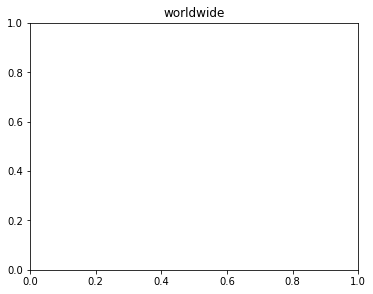

In [72]:
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.title('worldwide')
plt.bar(x = df1_worldwide_pivot[0], height = df1_worldwide_pivot[0])
plt.xticks(rotation=90)